# Home Work 6 (112)
## (APANPS5335_002_2023_3 - MACHINE LEARNING: CONCEPTS & APPLICATION)

## Submitted by: Eli Guo
## UNI: yg2869
### Posted: 11/21/2023 | Due: 12/05/2023 by 11:59 pm

Please submit your well-organized PDF and notebook to Gradescope, ensuring alignment with each question or task. Minimize any extraneous output in your Jupyter notebooks or PDFs. Thank you!

## Sentiment Analysis and Evaluation (112 points)

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
stop_words = set(stopwords.words('english'))

## Task 1 (28 points) Data Preprocessing 
Dataset: IMDb Movie Reviews <br>
The dataset consists of movie reviews from the IMDb website, along with their corresponding sentiment labels (positive or negative). The dataset is divided into a training set and a test set, with 25,000 reviews in each set.

### 1.1 (1 points) Load Data 

In [3]:
df = pd.read_csv('IMDB-Dataset-F2023.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50100 entries, 0 to 50099
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50050 non-null  object
 1   sentiment  50038 non-null  object
dtypes: object(2)
memory usage: 782.9+ KB


### 1.2 (6 points) Any missing values?

- (2 points) Begin by describing the extent of missing data in the dataset.
- (2 points) If missing values are present, explain their impact on your analysis and the dataset, and demonstrate how you would handle them.
- (2 points) For educational purposes, comment on various methods commonly used in the field for handling missing values, and provide examples.

Please be sure to include evidence or plots to support your analysis.

In [6]:
# Checking for missing values in each column
print(df.isnull().sum())

review       50
sentiment    62
dtype: int64


In [7]:
# Percentage of missing values
print(df.isnull().mean() * 100)

review       0.099800
sentiment    0.123752
dtype: float64


The dataset contains missing values in both the 'review' and 'sentiment' columns, with approximately 0.1% missing in 'review' and 0.12% in 'sentiment'. The impact of these missing values on analysis and modeling can be significant. Missing text in the 'review' column directly affects the quality of input data for sentiment analysis, potentially skewing the language model's performance. Without complete textual data, the model's ability to accurately understand and predict sentiments can be compromised. Similarly, missing values in the 'sentiment' column result in a lack of labels, essential for supervised learning models. Unlabeled data can diminish the effectiveness of the training process, leading to a model that may not generalize well on unseen data.

Given the low percentage of missing data, a suitable approach to handling these missing values is the removal of rows containing any missing data. This method ensures that the model is trained on a dataset with complete information, thus maintaining the integrity and quality of the training process.

In [8]:
# Remove rows with missing values
df = df.dropna()

print(df.shape)

(49989, 2)


**Please comment on various methods commonly used for handling missing data and provide examples if necessary**

Handling missing data is a fundamental step in preparing datasets for analysis or machine learning. The method chosen depends on the nature and extent of the missing data, as well as the type of analysis or modeling being performed.

One common approach is deletion, where rows or columns with missing values are entirely removed. This is straightforward but can lead to a significant loss of data, especially if missing values are widespread. Deletion is often used when the missing values are random and don't form a large portion of the data. For example, in a survey dataset with few missing responses, rows with missing data can be dropped without much impact on the overall analysis.

Another widely used method is imputation, which involves filling in missing values with substitutes. Simple imputation techniques include using the mean, median, or mode of a column to replace missing values. This approach works well when the missing data is randomly distributed and the substituted value is a reasonable estimate for the missing one. For instance, in a dataset with missing age values, filling in the missing entries with the average age can be a practical solution.

More sophisticated imputation techniques involve using predictive models. Here, algorithms like linear regression, decision trees, or k-nearest neighbors are used to predict and fill in missing values based on other attributes in the data. This method is particularly useful when there are patterns or relationships in the data that can help predict the missing values. For example, in a housing price dataset, missing values for house size could be predicted based on other features like the number of rooms, location, and price.

In the case of categorical data, a common method is to treat missing values as a separate category. This is particularly useful when the missing value itself holds information. For instance, in a dataset of customer preferences, missing values in a column like 'preferred product category' can be assigned a label like 'Unknown', indicating that these customers haven't expressed a preference.

Lastly, some machine learning algorithms can handle missing values inherently. For example, tree-based models like Random Forests can split nodes using only the non-missing values, effectively working around the missing data. This approach is beneficial when the dataset has a significant amount of missing data, and deletion or imputation might lead to biased or inaccurate models.

Each of these methods has its advantages and drawbacks, and the choice largely depends on the specific context of the dataset and the goals of the analysis or model building. The key is to understand the nature of the missing data and select a method that best preserves the integrity and representativeness of the dataset.

### 1.3 (6 points) Any duplicate records?
- (2 points) Start by checking for the presence of duplicate records in the dataset and quantifying them.
- (2 points) If duplicates are found, demonstrate how you would handle them.
- (2 points) For educational purposes, please list various methods commonly used in the field for handling duplicate records, and provide examples. <br>

Please be sure to include evidence or plots to support your analysis.

In [9]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

516


In [10]:
# Remove duplicate records
df = df.drop_duplicates()

print(df.shape)

(49473, 2)


**Please comment on various methods commonly used for handling duplicate records and provide examples if necessary**

In the field of data preprocessing, handling duplicate records is a crucial step to ensure the integrity and quality of the data. There are several methods employed to address this issue, each suited to different scenarios and requirements.

One common approach is the outright removal of all duplicate rows. This method is straightforward and often used when duplicates do not carry any significance for the analysis. For instance, in a dataset where each row should represent a unique entry, any repetition might be a result of data entry errors or data merging processes. In such cases, using a simple drop_duplicates() function in Pandas would suffice to eliminate these redundancies.

Another technique involves keeping either the first or the last occurrence of the duplicate. This method is particularly useful in datasets where entries are time-stamped and the most recent or the earliest record holds more relevance. For example, in a dataset tracking price changes of products, keeping the latest price (i.e., the last duplicate) might be more beneficial for analyzing current market trends.

Sometimes, duplicates are identified and handled based on specific columns rather than the entire row. This approach is essential when a combination of certain fields needs to be unique, but other fields can vary. For instance, in a customer transaction dataset, while customer IDs and transaction dates should be unique together, other details like transaction amount or items purchased might differ.

In more complex scenarios, custom logic might be applied to decide which duplicates to keep. This often involves grouping data based on certain criteria and then applying a function to determine the retention or removal of duplicates. For example, in a survey dataset, if multiple entries from the same participant exist, one might choose to keep the entry with the most complete information or the average of the values provided.

Each of these methods has its unique applications and considerations. The choice largely depends on the nature of the dataset, the context of the analysis, and the specific requirements of the task at hand. It's crucial to understand the data thoroughly to make an informed decision about which method to apply for handling duplicates.

### 1.4 (8 points) Balance? 
Analyze the balance of sentiment labels in the IMDB movie review dataset. Please provide evidence or plots to support your analysis.

- (2 points) Calculate the distribution of sentiment labels in the dataset.
- (2 points) Create a bar plot to visualize the balance of sentiment labels.
- (2 points) If the data is imbalanced, demonstrate how you would address this issue.
- (2 points) For educational purposes, please comment on various methods commonly used in the field for handling imbalanced data, and provide examples.

In [11]:
# Calculate the distribution of sentiment labels
label_distribution = df['sentiment'].value_counts()
print(label_distribution)

sentiment
positive    24831
negative    24642
Name: count, dtype: int64


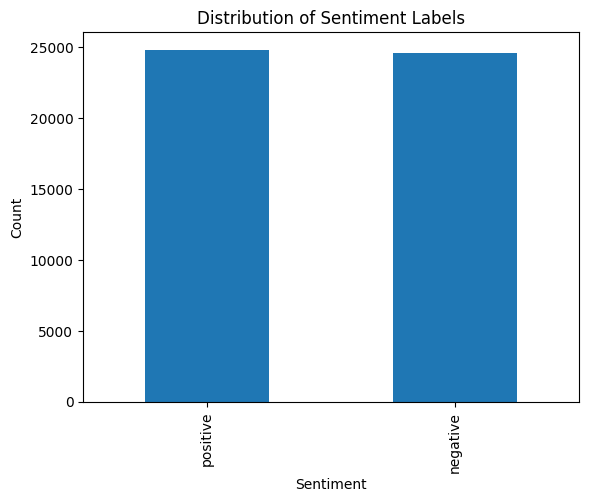

In [12]:
# Plotting the distribution of sentiments as a bar chart
label_distribution.plot(kind='bar')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Please Analyze the Results**:<br>

The distribution of sentiment labels in the IMDb movie review dataset indicates a fairly balanced scenario between positive and negative reviews. With 24,831 positive and 24,642 negative reviews, the dataset presents a nearly equal split between the two sentiment categories. This balance is crucial in sentiment analysis tasks, as it suggests that the machine learning models trained on this dataset will not be inherently biased towards one sentiment over the other.

In datasets where one category significantly outnumbers the other, models can develop a bias, tending to predict the majority class more often. This is not ideal for achieving accurate and unbiased predictions. However, in your case, the slight difference between the counts of positive and negative reviews is marginal and unlikely to cause significant bias in predictive modeling. This balance allows for more reliable training and validation of models, as it provides an equal representation of both sentiments.

Moreover, the balanced nature of this dataset might simplify some aspects of the data preprocessing and model training phases. There might be no need for techniques like oversampling or undersampling, which are typically employed to address class imbalance issues. This can lead to more straightforward model training and evaluation processes. Overall, the near-equal distribution of sentiment labels in your dataset is a positive indicator for the robustness and fairness of any sentiment analysis models you develop using this data.

**Please comment on various methods commonly used for handling imbalanced data and provide examples if necessary:** <br>

Handling imbalanced data is a common challenge in machine learning, especially in classification problems where the distribution of classes is skewed. One straightforward approach is resampling, which can be either undersampling or oversampling. Undersampling involves reducing the instances of the majority class to balance the dataset. While this can mitigate imbalance, it also leads to loss of potentially valuable data. Oversampling, on the other hand, increases the instances of the minority class, either by duplicating existing instances or, more effectively, by generating synthetic samples. A popular technique for synthetic sample generation is Synthetic Minority Over-sampling Technique (SMOTE), which creates new, plausible examples of the minority class by interpolating between existing ones.

Another approach is to use algorithm-level solutions that inherently manage imbalance. Some algorithms, like decision trees, can handle imbalance to a certain extent due to their hierarchical structure. However, more sophisticated methods involve modifying existing algorithms to make them more sensitive to the minority class. This could involve incorporating class weights, where higher significance is given to the minority class during the training process.

Cost-sensitive learning is also a valuable strategy. This technique assigns a higher cost to misclassifying the minority class compared to the majority class, thereby nudging the algorithm to pay more attention to the minority class. Ensemble methods like Random Forest can be adapted to be cost-sensitive, improving their performance on imbalanced datasets.

A more nuanced approach involves changing the evaluation metrics used to assess model performance. Traditional metrics like accuracy can be misleading in imbalanced settings. Metrics such as Precision-Recall AUC, F1-Score, or the G-mean provide a more realistic picture of a model's performance in the context of class imbalance.

Lastly, anomaly detection techniques can sometimes be employed, especially in cases where the minority class is not just underrepresented but also significantly different from the majority class. These techniques focus on identifying the 'anomalous' or rare instances, which are often the points of interest.

In practice, the choice of method depends on the specific context of the problem, the degree of imbalance, and the nature of the data. It's not uncommon to combine several of these approaches to achieve a more robust and effective model.

### 1.5 (2 points) Data Splitting
Split the clean dataset into training and testing sets

In [13]:
# Split into 80% training and 20% testing sets using train_test_split and random_state=42, taking into account the balanced distribution of the 'sentiment' classes
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df['sentiment'])

### 1.6 (5 points) Clean the text data
Provide code examples for cleaning text data, including removing punctuation, digits, and stop words, tokenizing, and converting to lowercase.
[Hint: Utilize libraries or functions like NLTK or regular expressions for this purpose.].

In [14]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    
    return clean_text

train_df['cleaned_review'] = train_df['review'].apply(clean_text)
test_df['cleaned_review'] = test_df['review'].apply(clean_text)

## Task 2 (46 points) Sentiment Analysis: Bag of Words and simple Features
**For Each Model**
- Train a model on the cleaned text data in the training set.
- Use the trained logistic regression model to predict the sentiment labels in the testing set(positive or negative).
- Compute the accuracy, precision, recall, F1 score, and provide a comprehensive classification report for the sentiment analysis model you've developed.
- Visualize the confusion matrix of the sentiment analysis model.

### 2.1 (12 points) Simple Text-Based Model Using a Bag-of-Words Approach and a LogisticRegression
- (4 points) Train a model.
- (2 points) Predict the sentiment labels
- (4 points) Compute the accuracy, precision, recall, F1 score, and provide a comprehensive classification report.
- (2 points) Visualize the confusion matrix.

In [15]:
# Create a Bag-of-Words model
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_df['cleaned_review'])

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow, train_df['sentiment'])

LogisticRegression(max_iter=1000)

In [16]:
# Transform the test data to the same format as the training data
X_test_bow = vectorizer.transform(test_df['cleaned_review'])

# Predict sentiment labels on the test set
y_pred = model.predict(X_test_bow)

In [17]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_df['sentiment'], y_pred)
precision = precision_score(test_df['sentiment'], y_pred, pos_label='positive')
recall = recall_score(test_df['sentiment'], y_pred, pos_label='positive')
f1 = f1_score(test_df['sentiment'], y_pred, pos_label='positive')

# Print the scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8873168266801414
Precision: 0.8837950966713175
Recall: 0.8928715263793798
F1 Score: 0.8883101272162677


In [18]:
# Comprehensive classification report
print(classification_report(test_df['sentiment'], y_pred))

              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      4929
    positive       0.88      0.89      0.89      4966

    accuracy                           0.89      9895
   macro avg       0.89      0.89      0.89      9895
weighted avg       0.89      0.89      0.89      9895



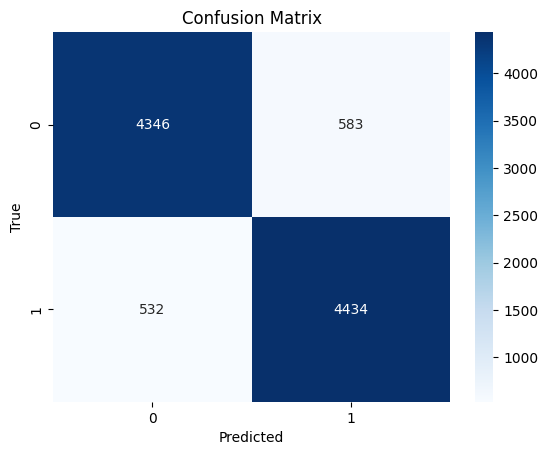

In [19]:
# Generate a confusion matrix
cm = confusion_matrix(test_df['sentiment'], y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 2.2 (30 points) Exploring Advanced Techniques for Tuning the Bag-of-Words Model
Try using n-grams, characters, tf-idf rescaling and possibly other ways to tune the BoW model. Be aware that you might need to adjust the (regularization of the) linear model for different feature sets

In [20]:
# Create a Bag-of-Words model with n-grams
vectorizer_ngram = CountVectorizer(ngram_range=(1, 2))
X_train_ngram = vectorizer_ngram.fit_transform(train_df['cleaned_review'])

# Train a logistic regression model on the n-gram data
model_ngram = LogisticRegression(max_iter=1000)
model_ngram.fit(X_train_ngram, train_df['sentiment'])

LogisticRegression(max_iter=1000)

In [21]:
# Create a character-level Bag-of-Words model
vectorizer_char = CountVectorizer(analyzer='char')
X_train_char = vectorizer_char.fit_transform(train_df['cleaned_review'])

# Train a logistic regression model on the character-level data
model_char = LogisticRegression(max_iter=1000, C=0.1)
model_char.fit(X_train_char, train_df['sentiment'])

LogisticRegression(C=0.1, max_iter=1000)

In [22]:
# Create a TF-IDF model
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(train_df['cleaned_review'])

# Train a logistic regression model on the TF-IDF data
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, train_df['sentiment'])

LogisticRegression(max_iter=1000)

### 2.3 (4 points) Comparison

Compare and analyze the performance results between the models in Section 2.1 and Section 2.2. Present your findings in a well-organized table and provide insightful comments on the observed differences or improvements

In [23]:
# Transform test data and predict using the n-gram model
X_test_ngram = vectorizer_ngram.transform(test_df['cleaned_review'])
y_pred_ngram = model_ngram.predict(X_test_ngram)

# Compute metrics for the n-gram model
accuracy_ngram = accuracy_score(test_df['sentiment'], y_pred_ngram)
precision_ngram = precision_score(test_df['sentiment'], y_pred_ngram, pos_label='positive')
recall_ngram = recall_score(test_df['sentiment'], y_pred_ngram, pos_label='positive')
f1_ngram = f1_score(test_df['sentiment'], y_pred_ngram, pos_label='positive')

In [24]:
# Transform test data and predict using the character-level model
X_test_char = vectorizer_char.transform(test_df['cleaned_review'])
y_pred_char = model_char.predict(X_test_char)

# Compute metrics for the character-level model
accuracy_char = accuracy_score(test_df['sentiment'], y_pred_char)
precision_char = precision_score(test_df['sentiment'], y_pred_char, pos_label='positive')
recall_char = recall_score(test_df['sentiment'], y_pred_char, pos_label='positive')
f1_char = f1_score(test_df['sentiment'], y_pred_char, pos_label='positive')

In [25]:
# Transform test data and predict using the TF-IDF model
X_test_tfidf = vectorizer_tfidf.transform(test_df['cleaned_review'])
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Compute metrics for the TF-IDF model
accuracy_tfidf = accuracy_score(test_df['sentiment'], y_pred_tfidf)
precision_tfidf = precision_score(test_df['sentiment'], y_pred_tfidf, pos_label='positive')
recall_tfidf = recall_score(test_df['sentiment'], y_pred_tfidf, pos_label='positive')
f1_tfidf = f1_score(test_df['sentiment'], y_pred_tfidf, pos_label='positive')

In [26]:
# Create a DataFrame for the comparison
comparison_df = pd.DataFrame({
    'Model': ['BoW', 'N-gram', 'Character-Level', 'TF-IDF'],
    'Accuracy': [accuracy, accuracy_ngram, accuracy_char, accuracy_tfidf],
    'Precision': [precision, precision_ngram, precision_char, precision_tfidf],
    'Recall': [recall, recall_ngram, recall_char, recall_tfidf],
    'F1 Score': [f1, f1_ngram, f1_char, f1_tfidf]
})

# Display the DataFrame
print(comparison_df)

             Model  Accuracy  Precision    Recall  F1 Score
0              BoW  0.887317   0.883795  0.892872  0.888310
1           N-gram  0.904093   0.901299  0.908377  0.904824
2  Character-Level  0.623345   0.624824  0.624446  0.624635
3           TF-IDF  0.896918   0.890538  0.905961  0.898183


The results from the comparison of different text representation techniques in sentiment analysis using logistic regression reveal some interesting insights. The Bag-of-Words (BoW) model, often considered a baseline in text classification tasks, shows commendable performance with an accuracy of 0.8873 and an F1 score of 0.8883. This demonstrates the effectiveness of the BoW approach in capturing sufficient information for sentiment analysis despite its simplicity.

The N-gram model, which extends the BoW approach by considering combinations of adjacent words, shows a notable improvement in performance. With an accuracy of 0.9041 and an F1 score of 0.9048, it outperforms the basic BoW model. This suggests that the inclusion of bigrams (2-word combinations) provides additional contextual information that helps the model better understand the sentiment expressed in the reviews.

The Character-Level model, which focuses on character sequences rather than words, significantly underperforms compared to the word-based models, with an accuracy of only 0.6233 and an F1 score of 0.6246. The need to apply stronger regularization (C=0.1) to achieve model convergence might have contributed to this underperformance. Character-level models can capture morphological patterns but may miss the broader context captured by word-level models, which is crucial in sentiment analysis.

Lastly, the TF-IDF model, which rescales the BoW representation based on the words' frequency across documents, also shows strong performance. With an accuracy of 0.8969 and an F1 score of 0.8982, it closely follows the N-gram model. This indicates that the TF-IDF weighting scheme effectively highlights the most relevant words for sentiment analysis, providing a balance between word frequency and informativeness.

In summary, these results underscore the importance of choosing the right text representation technique for sentiment analysis tasks. While N-gram and TF-IDF models offer improvements over the simple BoW model, demonstrating their ability to capture more nuanced linguistic patterns, the character-level approach seems less effective for this particular task. The choice of model and representation technique should thus be aligned with the specific characteristics of the dataset and the nature of the task at hand.

## Task 3 (38 points) Word Vectors

### 3.1 (3 points) 
Compute and plot the distribution of the length of the reviews (in terms of the number of words).

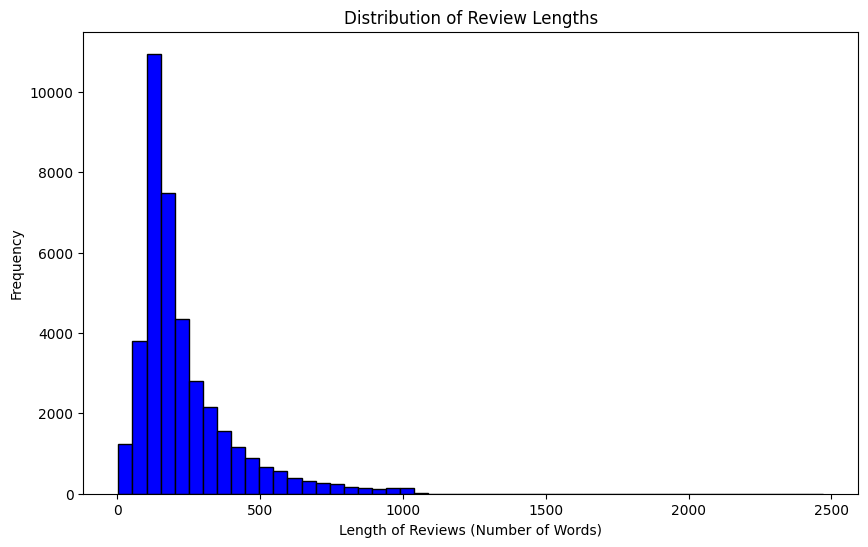

In [27]:
# Calculate the length of each review
train_df['review_length'] = train_df['review'].apply(lambda x: len(x.split()))

# Plotting the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(train_df['review_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Reviews (Number of Words)')
plt.ylabel('Frequency')
plt.show()

### 3.2 (5 points) 
Compute the frequency of the top-k most common words in the training set.

In [28]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
# Assuming 'cleaned_review' is the column after preprocessing
X_train_counts = vectorizer.fit_transform(train_df['cleaned_review'])

# Sum word occurrences
word_freq = X_train_counts.sum(axis=0)

# Create a DataFrame for word frequencies
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame(word_freq, columns=words, index=['frequency']).transpose()

In [29]:
# Define k
k = 20

# Sort words by frequency
top_k_words = word_freq_df.sort_values(by='frequency', ascending=False).head(k)

# Display the top-k words
print(top_k_words)

        frequency
br          91037
movie       66079
film        59169
one         40573
like        30865
good        22689
even        19539
would       19060
time        18492
really      18125
see         17679
story       17658
much        14938
well        14915
get         14423
also        14142
great       14088
people      13959
bad         13936
first       13679


### 3.3 (5 points) Word2Vec Training

Train a Word2Vec model on the cleaned text data in the training set. <br>
Save the trained model to a file for later use. <br>

In [30]:
# Splitting each review into a list of words
sentences = [review.split() for review in train_df['cleaned_review']]

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
word2vec_model.save("word2vec_model.model")

### 3.4 (6 points) Word Embedding Visualization

Visualize the embeddings of the top-k most common words in the training set using t-SNE. <br>

visualized the embeddings of specific words like "good," "bad," "great," and "terrible" using t-SNE.

In [31]:
# Extract top k words from the word frequency DataFrame
top_k_word_list = top_k_words.index.tolist()

# Specific words to visualize
specific_words = ["good", "bad", "great", "terrible"]

# Combine with the top-k most common words
words_to_visualize = specific_words + top_k_word_list

# Filter out any words not present in the Word2Vec model's vocabulary
filtered_words = [word for word in words_to_visualize if word in word2vec_model.wv.key_to_index]

# Extract the word vectors
word_vectors = [word2vec_model.wv[word] for word in filtered_words]

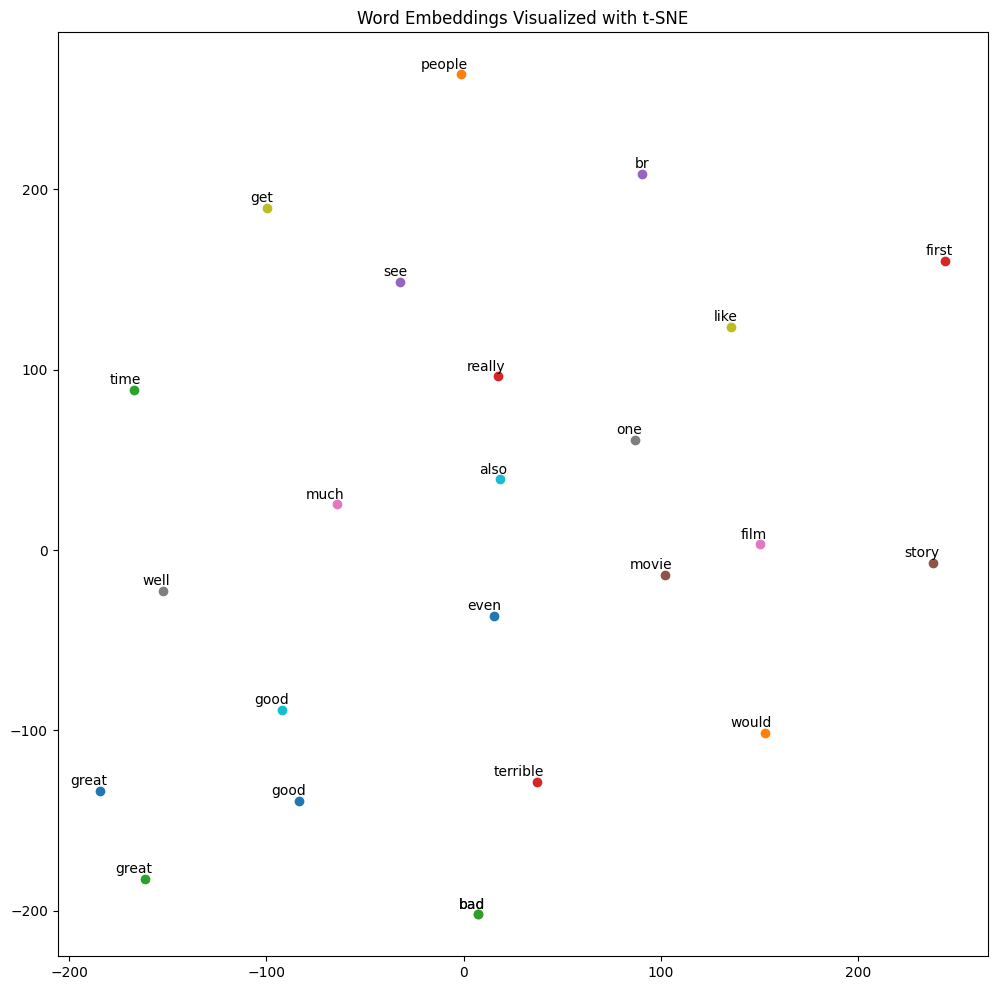

In [32]:
# Convert list of vectors to a 2D array
word_vectors_array = np.array(word_vectors)

# Adjusted perplexity value
perplexity_value = 10

# Apply t-SNE transformation with adjusted perplexity
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
word_vectors_2d = tsne.fit_transform(word_vectors_array)

# Plotting the word embeddings
plt.figure(figsize=(12, 12))
for word, (x, y) in zip(filtered_words, word_vectors_2d):
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title("Word Embeddings Visualized with t-SNE")
plt.show()

### 3.5 (15 points) Sentiment Analysis and Evaluation

- (3 points) Convert the cleaned text data in the test set to vectors using the trained Word2Vec model.
- (3 points) Train a logistic regression model on the vector representations of the text data in the training set.
- (3 points) Use the trained logistic regression model to predict the sentiment labels (positive or negative) of the text data in the test set.
- (3 points) Calculate the accuracy, precision, recall, and F1 score of the sentiment analysis model.
- (3 points) Visualize the confusion matrix of the sentiment analysis model.

In [33]:
def document_vector(doc):
    """Create document vectors by averaging word vectors."""
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0) if doc else np.zeros((word2vec_model.vector_size,))

# Apply the function to each cleaned review in the test set
X_test_vectors = np.array([document_vector(doc.split()) for doc in test_df['cleaned_review']])

In [34]:
# Prepare the training data vectors
X_train_vectors = np.array([document_vector(doc.split()) for doc in train_df['cleaned_review']])

# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_vectors, train_df['sentiment'])

LogisticRegression(max_iter=1000)

In [35]:
y_pred = logistic_model.predict(X_test_vectors)

In [36]:
accuracy = accuracy_score(test_df['sentiment'], y_pred)
precision = precision_score(test_df['sentiment'], y_pred, pos_label='positive')
recall = recall_score(test_df['sentiment'], y_pred, pos_label='positive')
f1 = f1_score(test_df['sentiment'], y_pred, pos_label='positive')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.85922182920667
Precision: 0.8543939694505058
Recall: 0.8672976238421265
F1 Score: 0.8607974417907465


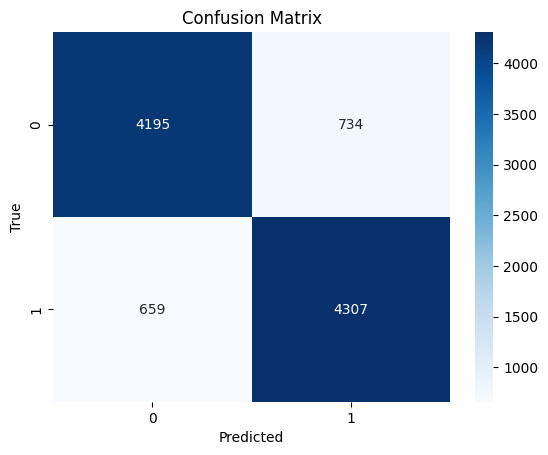

In [37]:
# Generate the confusion matrix
cm = confusion_matrix(test_df['sentiment'], y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 3.6 (4 points) Does the word-embedding improve classification?

In examining the impact of using word embeddings, particularly Word2Vec, for sentiment analysis, a notable observation emerges when comparing its performance with that of the traditional Bag-of-Words (BoW) approaches. The logistic regression model trained on Word2Vec features achieved an accuracy of approximately 85.9%, with precision, recall, and F1 score aligning closely. These metrics are respectable, especially considering the complex nature of sentiment analysis tasks.

When contrasted with the BoW models, including those enhanced with n-grams and TF-IDF, the Word2Vec model presents a different performance profile. The highest performing BoW model, which employed n-grams, achieved an accuracy of around 90.4%, surpassing the Word2Vec model. This might initially suggest a superior efficacy of the n-gram approach over Word2Vec in this context. However, it's important to delve deeper into the qualitative differences between these methods.

Word2Vec models capture semantic relationships between words by considering the context in which words appear. This approach can lead to a more nuanced understanding of language, potentially offering better generalization capabilities, especially with unseen data or more varied linguistic expressions. BoW models, including those with n-grams, tend to focus on the presence or absence of specific word combinations, which can limit their ability to grasp the subtleties of language. Their performance, while impressive in certain datasets, might not reflect an equally robust understanding of language semantics.

Moreover, Word2Vec's lower performance could also be attributed to factors like the size and diversity of the training dataset, the dimensionality of the word vectors, and the specifics of the model's training process. In scenarios where linguistic context plays a pivotal role, such as with idiomatic expressions or nuanced sentiments, Word2Vec's ability to capture word relationships could be particularly advantageous.

In conclusion, while the BoW models, particularly with n-grams, showed higher accuracy in this specific sentiment analysis task, the Word2Vec model brings a valuable dimension of semantic understanding to the table. Its slightly lower performance in this instance does not detract from its potential utility, especially in tasks where deeper linguistic comprehension is essential. The choice between these approaches should be guided by the specific requirements and characteristics of the task at hand, with an understanding that different methods bring their own strengths and limitations.